# Experiments on Books

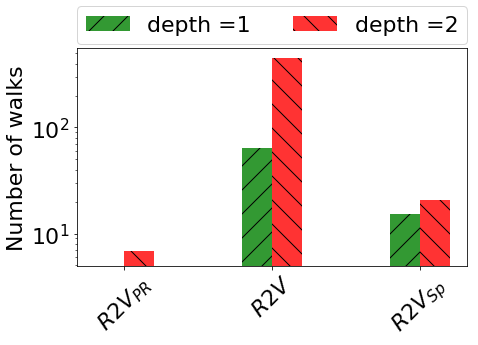

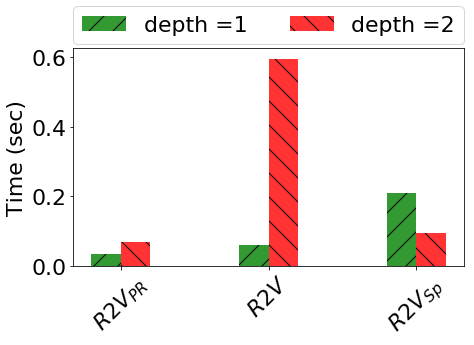

In [7]:
import datetime
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dirname = "./random_walks/"
statisticsFile = pd.read_csv(dirname + '20180412_0228_entities_3000_qlimit500_statistics_books.txt',sep='\t', skiprows = 1)

statisticsFile = statisticsFile[statisticsFile['Case'] < 11]
statisticsFile = statisticsFile.sort_values(by = ['Case','Depth'], ascending=[1, 1])
new_index = np.arange(len(statisticsFile))
statisticsFile = statisticsFile.set_index(new_index)

labels = ["NRSE","NRSE'","UE","UEP","NRST","NRST'","$R2V_{PR}$","$R2V$","$R2V$","$R2V_{Sp}$","$NRSE_{Sp}$","NRSE'-Sp","$UE_{Sp}$","$UEP_{Sp}$","$NRST_{Sp}$","NRST'-Sp","$UET_{Sp}$","$UETP_{Sp}$"]
styles = ['b--', 'r--', 'g--', 'y--','c--','m--','k--','b-', 'r-', 'g-', 'y-','c-','m-','k-']
markers = ['o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D']


cases = np.sort(np.unique(statisticsFile['Case'].tolist()))
depths = np.sort(np.unique(statisticsFile['Depth'].tolist()))

casesX = (7,9,10)

plotWidth = 7
plotHeight = 4
barstyles = ['g', 'r', 'c', 'y']
patterns = ('/', '\\', 'x', '//', '+','x','.', 'o', 'O', '.')
bar_width = 0.2
opacity = 0.8
depths2 = list([1,2])

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 22}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))
plt.yscale('log')

for depth in depths:

    dataslice = statisticsFile[statisticsFile['Depth'] == depth]
    #casesX = dataslice['Case'].tolist()
    labelsX = [labels[i-1] for i in casesX]
    tokensY = dataslice['AvgQResults'].tolist()
    intlabelcases = np.arange(1,len(casesX)+1)
    plt.bar(0.1+intlabelcases + (depths2.index(depth)-1)*bar_width, tokensY, bar_width,
                 alpha=opacity,
                 color=barstyles[depth-1], hatch=patterns[depth-1],
                 label="depth =" + str(depth))

    
plt.ylabel('Number of walks')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), #fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
plt.xticks(intlabelcases, labelsX, rotation=45)
plt.savefig(dirname + 'results/avg_num_walks_books.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))
#plt.yscale('log')
for depth in depths:
    dataslice = statisticsFile[statisticsFile['Depth'] == depth]
    #casesX = dataslice['Case'].tolist()
    labelsX = [labels[i-1] for i in casesX]
    tokensY = dataslice['AvgQT'].tolist()
    intlabelcases = np.arange(1,len(casesX)+1)
    plt.bar(0.1+intlabelcases + (depths2.index(depth)-1)*bar_width, tokensY, bar_width,
                 alpha=opacity,
                 color=barstyles[depth-1], hatch=patterns[depth-1],
                 label="depth =" + str(depth))

plt.ylabel('Time (sec)')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), #fontsize = 'small',
           ncol=3, mode="expand", borderaxespad=0.)
plt.xticks(intlabelcases, labelsX, rotation=45)
plt.savefig(dirname + 'results/avg_querytime_books' + '.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

Plotting austen
k@[6]


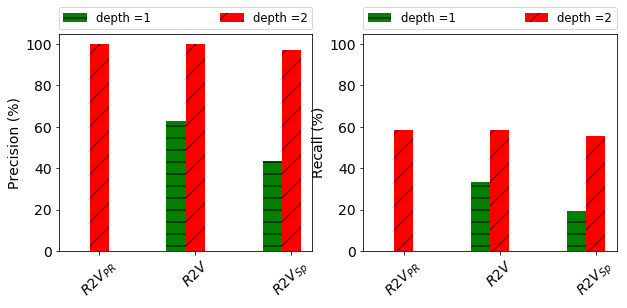

Plotting christie
k@[70]


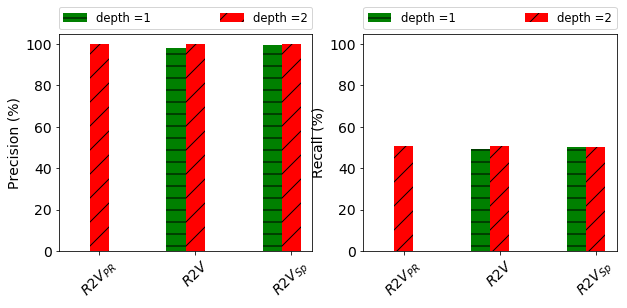

Plotting crichton
k@[13]


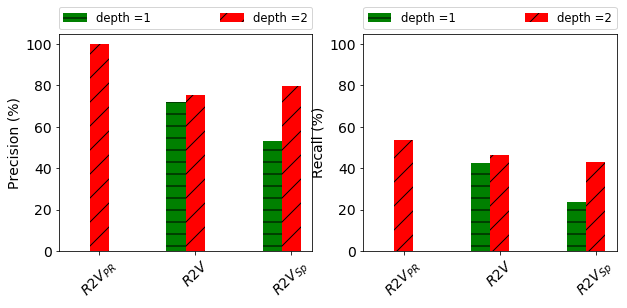

Plotting dickens
k@[22]


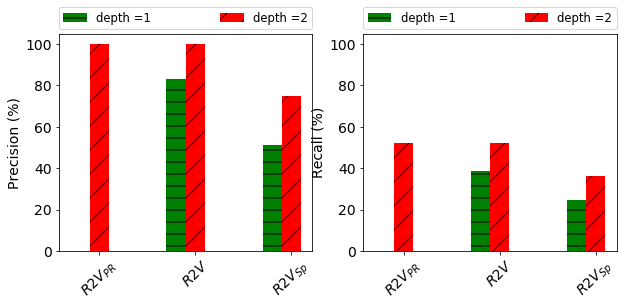

Plotting fitzgerald
k@[4]


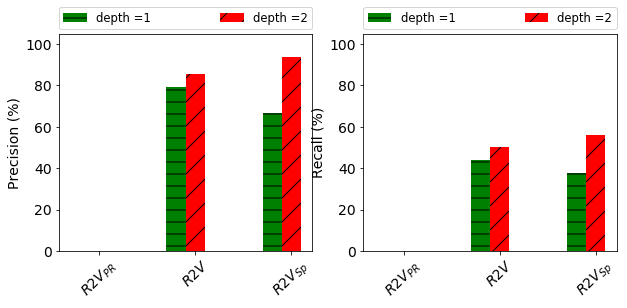

Plotting grisham
k@[16]


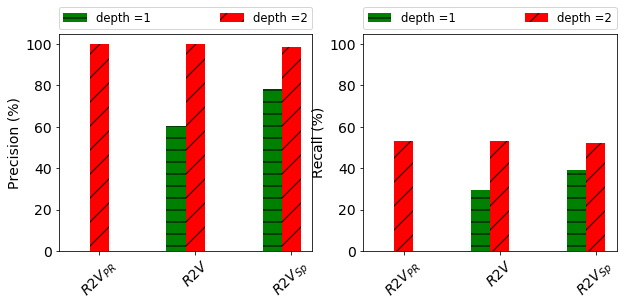

Plotting grrm
k@[5]


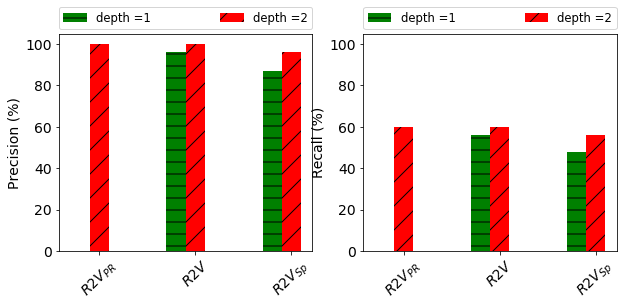

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


depths2 = list([1,2])
plotWidth = 10
plotHeight = 4

barstyles = ['g', 'r', 'c', 'y']
patterns = ('-', '/', '\\', 'x', '\\', '*', 'o', 'O', '.')
rec = 3

cases = (7,9,10)#,11,13,15,17)
labelsX = [labels[i-1] for i in cases]
font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 14}
matplotlib.rc('font', **font)
    
outputDir = dirname + 'results_books/'
authors = ('christie', 'fitzgerald', 'grisham', 'grrm')
authors = ('austen', 'christie', 'crichton', 'dickens', 'fitzgerald', 'grisham', 'grrm')

authorLabels = ('Agatha Christie', 'F. Scott Fitzgerald', 'John Grisham', 'George R. R. Martin')
for i in np.arange(0,len(authors)):

    author = authors[i]
    print('Plotting ' + authors[i])
    resultsFile = open(dirname + 'results_books/' + author + '_20180510-2227_avg.txt', 'r')

    datalist = []

    for line in resultsFile:
        line = line.rstrip('\n')
        words = line.split('\t')
        scheme = words[0]
        currcase = int(scheme[scheme.index('case_')+5:scheme.index('_d')])
        k = int(words[1])
        precision = float(words[2])
        recall = float(words[3])
        if (precision == 0 and recall == 0):
            fscore = 0.0
        else:
            fscore = 2*(precision*recall)/(precision+recall)
        if currcase not in cases:
            continue
        datalist.append([scheme, currcase, k, precision, recall, fscore])

    sortedData = sorted(datalist, key=lambda result:result[1])

    kvals = np.sort(np.unique([s[2] for s in sortedData]))
    kvals = [np.max(kvals)]
    print('k@' + str(kvals))
    
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(plotWidth,plotHeight))
    
    for k in np.arange(0,len(kvals)):
        plt.subplot(1,2,1)#, figsize=(plotWidth,plotHeight))
        bar_width = 0.2
        opacity = 1.0
        idx = 0
        for depth in depths2:
            data = [s for s in sortedData if ("d_" + str(depth)) in s[0] and s[2] == kvals[k]]
            YP = [y[3] for y in data]
            intlabelcases = np.arange(1,len(cases)+1)
            plt.bar(-0.2 + intlabelcases + (depths2.index(depth))*bar_width, YP, bar_width,
                     alpha=opacity,
                     color=barstyles[depth-1], hatch=patterns[depth-1],
                     label="depth =" + str(depth))
            idx = idx + 1

    plt.ylim(0.0, 105.0)
    plt.ylabel('Precision (%)')
    plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
    plt.xticks(intlabelcases, labelsX, rotation=45)
        #fig.tight_layout()
    #plt.savefig(outputDir + movie + '_' + str(kvals[k]) + '_precision.pdf', format='pdf', dpi=600, bbox_inches='tight')
    
    for k in np.arange(0,len(kvals)):    
        plt.subplot(1,2,2)
        bar_width = 0.2
        opacity = 1.0
        idx = 0
        for depth in depths2:
            data = [s for s in sortedData if ("d_" + str(depth)) in s[0] and s[2] == kvals[k]]
            YP = [y[4] for y in data]
            intlabelcases = np.arange(1,len(cases)+1)
            plt.bar(-0.2 + intlabelcases + (depths2.index(depth))*bar_width, YP, bar_width,
                     alpha=opacity,
                     color=barstyles[depth-1], hatch=patterns[depth-1],
                     label="depth =" + str(depth))
            idx = idx + 1

    plt.ylim(0.0, 105.0)
    plt.ylabel('Recall (%)')
    plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
    plt.xticks(intlabelcases, labelsX, rotation=45)
        
    #fig.savefig(outputDir + movie + '_' + str(kvals[k]) + '_results.pdf', format='pdf', dpi=600, bbox_inches='tight')
    #fig.tight_layout()
    plt.show()
    #close(fig)

# Experiments on Music Albums

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dirname = "./random_walks/"
statisticsFile = pd.read_csv(dirname + '20180408_0636_entities_3000_qlimit500_statistics_albums.txt',sep='\t', skiprows = 1)

statisticsFile = statisticsFile[statisticsFile['Depth'] < 3]
statisticsFile = statisticsFile.sort_values(by = ['Case','Depth'], ascending=[1, 1])
new_index = np.arange(len(statisticsFile))
statisticsFile = statisticsFile.set_index(new_index)

labels = ["NRSE","NRSE'","UE","UEP","NRST","NRST'","$R2V_{PR}$","$R2V$","$R2V$","$R2V_{Sp}$","$NRSE_{Sp}$","NRSE'-Sp","$UE_{Sp}$","$UEP_{Sp}$","$NRST_{Sp}$","NRST'-Sp","$UET_{Sp}$","$UETP_{Sp}$"]
styles = ['b--', 'r--', 'g--', 'y--','c--','m--','k--','b-', 'r-', 'g-', 'y-','c-','m-','k-']
markers = ['o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D']

#statisticsFile.head()

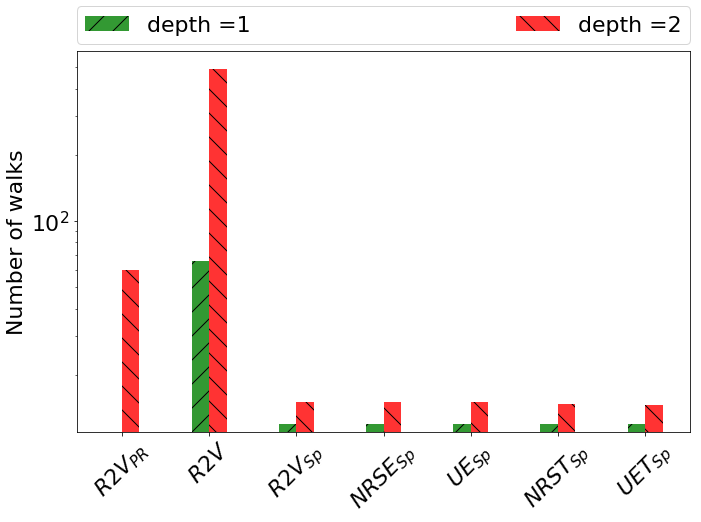

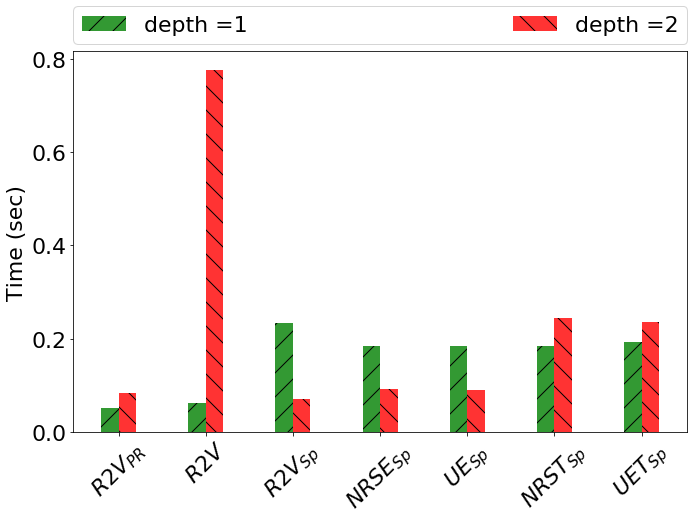

In [29]:
import datetime
import matplotlib

cases = np.sort(np.unique(statisticsFile['Case'].tolist()))
depths = np.sort(np.unique(statisticsFile['Depth'].tolist()))

plotWidth = 11
plotHeight = 7
barstyles = ['g', 'r', 'c', 'y']
patterns = ('/', '\\', 'x', '//', '+','x','.', 'o', 'O', '.')
bar_width = 0.2
opacity = 0.8
depths2 = list([1,2])

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 22}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))
plt.yscale('log')

for depth in depths:

    dataslice = statisticsFile[statisticsFile['Depth'] == depth]
    casesX = dataslice['Case'].tolist()
    labelsX = [labels[i-1] for i in casesX]
    tokensY = dataslice['AvgQResults'].tolist()
    intlabelcases = np.arange(1,len(casesX)+1)
    plt.bar(0.1+intlabelcases + (depths2.index(depth)-1)*bar_width, tokensY, bar_width,
                 alpha=opacity,
                 color=barstyles[depth-1], hatch=patterns[depth-1],
                 label="depth =" + str(depth))

    
plt.ylabel('Number of walks')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), #fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
plt.xticks(intlabelcases, labelsX, rotation=45)
#plt.savefig(dirname + 'results/avg_num_walks_albums.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))
#plt.yscale('log')
for depth in depths:
    dataslice = statisticsFile[statisticsFile['Depth'] == depth]

    casesX = dataslice['Case'].tolist()
    labelsX = [labels[i-1] for i in casesX]
    tokensY = dataslice['AvgQT'].tolist()
    intlabelcases = np.arange(1,len(casesX)+1)
    plt.bar(0.1+intlabelcases + (depths2.index(depth)-1)*bar_width, tokensY, bar_width,
                 alpha=opacity,
                 color=barstyles[depth-1], hatch=patterns[depth-1],
                 label="depth =" + str(depth))

plt.ylabel('Time (sec)')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), #fontsize = 'small',
           ncol=3, mode="expand", borderaxespad=0.)
plt.xticks(intlabelcases, labelsX, rotation=45)
#plt.savefig(dirname + 'results/avg_querytime_albums' + '.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

Plotting mj
k@[11]


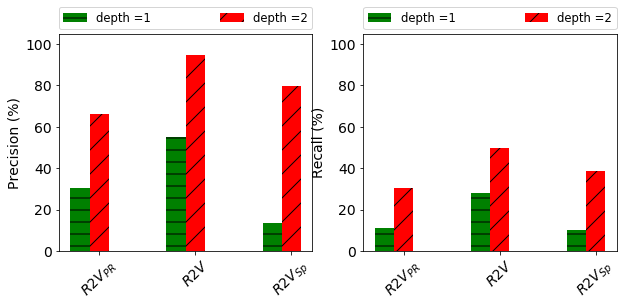

Plotting metallica
k@[13]


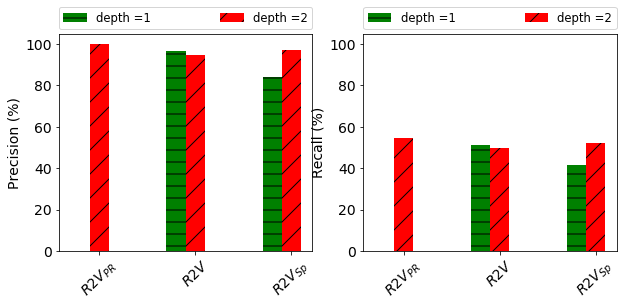

Plotting floyd
k@[25]


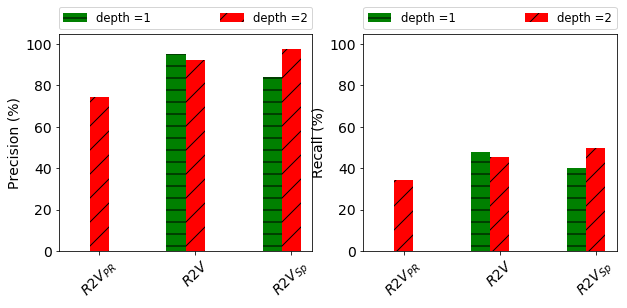

Plotting sabbath
k@[24]


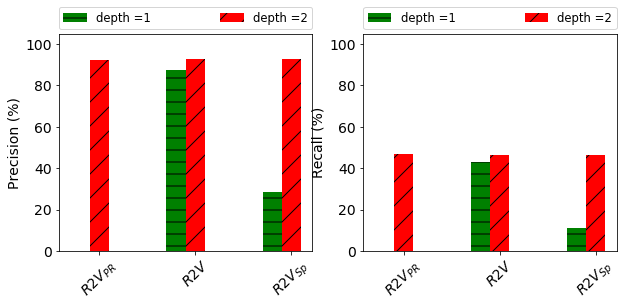

Plotting j5
k@[16]


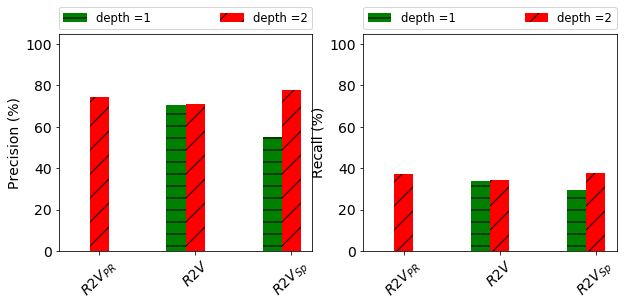

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


styles = ['b--', 'r--', 'g--', 'y--','c--','m--','k--','b-', 'r-', 'g-', 'y-','c-','m-','k-','b:', 'r:', 'g:', 'y:','c:','m:','k:']
markers = ['o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D']

depths2 = list([1,2])
plotWidth = 10
plotHeight = 4

barstyles = ['g', 'r', 'c', 'y']
patterns = ('-', '/', '\\', 'x', '\\', '*', 'o', 'O', '.')
rec = 3

cases = (7,9,10)#,11,13,15,17)
labelsX = [labels[i-1] for i in cases]
font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 14}
matplotlib.rc('font', **font)
    
    
outputDir = dirname + 'results/'
albums = ('mj', 'metallica', 'floyd', 'sabbath', 'j5')
albumlabels = ('Michael Jackson', 'Metallica', 'Pink Floyd', 'Black Sabbath', 'Jackson 5')
for i in np.arange(0,len(albums)):

    album = albums[i]
    print('Plotting ' + albums[i])
    resultsFile = open(dirname + 'results_albums/' + album + '_20180510-2232_avg.txt', 'r')

    datalist = []

    for line in resultsFile:
        line = line.rstrip('\n')
        words = line.split('\t')
        scheme = words[0]
        currcase = int(scheme[scheme.index('case_')+5:scheme.index('_d')])
        k = int(words[1])
        precision = float(words[2])
        recall = float(words[3])
        if (precision == 0 and recall == 0):
            fscore = 0.0
        else:
            fscore = 2*(precision*recall)/(precision+recall)
        if currcase not in cases:
            continue
        datalist.append([scheme, currcase, k, precision, recall, fscore])

    sortedData = sorted(datalist, key=lambda result:result[1])

    kvals = np.sort(np.unique([s[2] for s in sortedData]))
    kvals = [np.max(kvals)]
    print('k@' + str(kvals))
    
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(plotWidth,plotHeight))
    
    for k in np.arange(0,len(kvals)):
        plt.subplot(1,2,1)#, figsize=(plotWidth,plotHeight))
        bar_width = 0.2
        opacity = 1.0
        idx = 0
        for depth in depths2:
            data = [s for s in sortedData if ("d_" + str(depth)) in s[0]]# and s[2] == kvals[k]]
            YP = [y[3] for y in data]
            intlabelcases = np.arange(1,len(cases)+1)
            plt.bar(-0.2 + intlabelcases + (depths2.index(depth))*bar_width, YP, bar_width,
                     alpha=opacity,
                     color=barstyles[depth-1], hatch=patterns[depth-1],
                     label="depth =" + str(depth))
            idx = idx + 1

    plt.ylim(0.0, 105.0)
    plt.ylabel('Precision (%)')
    plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
    plt.xticks(intlabelcases, labelsX, rotation=45)
        #fig.tight_layout()
    #plt.savefig(outputDir + movie + '_' + str(kvals[k]) + '_precision.pdf', format='pdf', dpi=600, bbox_inches='tight')
    
    for k in np.arange(0,len(kvals)):    
        plt.subplot(1,2,2)
        bar_width = 0.2
        opacity = 1.0
        idx = 0
        for depth in depths2:
            data = [s for s in sortedData if ("d_" + str(depth)) in s[0]]# and s[2] == kvals[k]]
            YP = [y[4] for y in data]
            intlabelcases = np.arange(1,len(cases)+1)
            plt.bar(-0.2 + intlabelcases + (depths2.index(depth))*bar_width, YP, bar_width,
                     alpha=opacity,
                     color=barstyles[depth-1], hatch=patterns[depth-1],
                     label="depth =" + str(depth))
            idx = idx + 1

    plt.ylim(0.0, 105.0)
    plt.ylabel('Recall (%)')
    plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
    plt.xticks(intlabelcases, labelsX, rotation=45)
        
    #fig.savefig(outputDir + movie + '_' + str(kvals[k]) + '_results.pdf', format='pdf', dpi=600, bbox_inches='tight')
    #fig.tight_layout()
    plt.show()
    #close(fig)

In [33]:
print(data)
print(YP)
print(depth)

[['case_9_d_1_bn_1_PP_1_000', 9, 11, 55.1856224583, 28.0991735537, 37.23777825910289], ['case_10_d_1_bn_1_PP_1_000', 10, 11, 13.6947396038, 9.9173553719, 11.503900820006866]]
[55.1856224583, 13.6947396038]
1


In [34]:
print(sortedData)

[['case_7_d_1_bn_1_PP_1_000', 7, 10, 30.2896825397, 11.0, 16.138971648248514], ['case_7_d_2_bn_1_PP_1_000', 7, 11, 66.2606585334, 30.5785123967, 41.84571901879634], ['case_9_d_1_bn_1_PP_1_000', 9, 11, 55.1856224583, 28.0991735537, 37.23777825910289], ['case_9_d_2_bn_1_PP_1_000', 9, 11, 94.6923783287, 49.5867768595, 65.0889565905169], ['case_10_d_1_bn_1_PP_1_000', 10, 11, 13.6947396038, 9.9173553719, 11.503900820006866], ['case_10_d_2_bn_1_PP_1_000', 10, 11, 79.8612750885, 38.8429752066, 52.26518040454896]]
